In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
import plotly.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object

In [4]:
import os
os.chdir('D:\Data Science\POC\Time Series\worldwar')
import warnings            
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot') # style of plots. ggplot is one of the most used style, I also like it.
# Any results you write to the current directory are saved as output.

In [5]:
# bombing data
aerial = pd.read_csv("world-war-ii/operations.csv")
# first weather data that includes locations like country, latitude and longitude.
weather_station_location = pd.read_csv("weatherww2/Weather Station Locations.csv")
# Second weather data that includes measured min, max and mean temperatures
weather = pd.read_csv("weatherww2/Summary of Weather.csv")

##Description of Data
Aerial bombing Data description:
Mission Date: Date of mission
Theater of Operations: Region in which active military operations are in progress; "the army was in the field awaiting action"; Example: "he served in the Vietnam theater for three years"
Country: Country that makes mission or operation like USA
Air Force: Name or id of air force unity like 5AF
Aircraft Series: Model or type of aircraft like B24
Callsign: Before bomb attack, message, code, announcement, or tune that is broadcast by radio.
Takeoff Base: Takeoff airport name like Ponte Olivo Airfield
Takeoff Location: takeoff region Sicily
Takeoff Latitude: Latitude of takeoff region
Takeoff Longitude: Longitude of takeoff region
Target Country: Target country like Germany
Target City: Target city like Berlin
Target Type: Type of target like city area
Target Industry: Target industy like town or urban
Target Priority: Target priority like 1 (most)
Target Latitude: Latitude of target
Target Longitude: Longitude of target
Weather Condition data description:
Weather station location:
WBAN: Weather station number
NAME: weather station name
STATE/COUNTRY ID: acronym of countries
Latitude: Latitude of weather station
Longitude: Longitude of weather station
Weather:
STA: eather station number (WBAN)
Date: Date of temperature measurement
MeanTemp: Mean temperature

In [7]:
##check null values
aerial.apply(lambda x: sum(x.isnull()))

Mission ID                                    0
Mission Date                                  0
Theater of Operations                      3158
Country                                   51787
Air Force                                 51837
Unit ID                                  127368
Aircraft Series                             116
Callsign                                 178260
Mission Type                             131095
Takeoff Base                             174898
Takeoff Location                         174943
Takeoff Latitude                         175300
Takeoff Longitude                        175301
Target ID                                 50875
Target Country                              599
Target City                                2263
Target Type                               31911
Target Industry                           51802
Target Priority                           43561
Target Latitude                            8716
Target Longitude                        

There are too many values with Null , so removing the ones

In [8]:
# drop unused features
drop_list = ['Mission ID','Unit ID','Target ID','Altitude (Hundreds of Feet)','Airborne Aircraft',
             'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
             'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
             'High Explosives', 'High Explosives Type','Mission Type',
             'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
             'Incendiary Devices', 'Incendiary Devices Type',
             'Incendiary Devices Weight (Pounds)',
             'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
             'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
             'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)',
             'Total Weight (Tons)', 'Time Over Target', 'Bomb Damage Assessment','Source ID']
aerial.drop(drop_list, axis=1,inplace = True)

In [9]:
aerial.apply(lambda x: sum(x.isnull()))

Mission Date                  0
Theater of Operations      3158
Country                   51787
Air Force                 51837
Aircraft Series             116
Callsign                 178260
Takeoff Base             174898
Takeoff Location         174943
Takeoff Latitude         175300
Takeoff Longitude        175301
Target Country              599
Target City                2263
Target Type               31911
Target Industry           51802
Target Priority           43561
Target Latitude            8716
Target Longitude           8738
dtype: int64

In [10]:
aerial.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178281 entries, 0 to 178280
Data columns (total 17 columns):
Mission Date             178281 non-null object
Theater of Operations    175123 non-null object
Country                  126494 non-null object
Air Force                126444 non-null object
Aircraft Series          178165 non-null object
Callsign                 21 non-null object
Takeoff Base             3383 non-null object
Takeoff Location         3338 non-null object
Takeoff Latitude         2981 non-null object
Takeoff Longitude        2980 non-null float64
Target Country           177682 non-null object
Target City              176018 non-null object
Target Type              146370 non-null object
Target Industry          126479 non-null object
Target Priority          134720 non-null object
Target Latitude          169565 non-null float64
Target Longitude         169543 non-null float64
dtypes: float64(3), object(14)
memory usage: 23.1+ MB


In [11]:
#Removing some incorrect records 
aerial = aerial[ aerial.iloc[:,8]!="4248"] # drop this takeoff latitude 
aerial = aerial[ aerial.iloc[:,9]!=1355]   # drop this takeoff longitude

In [12]:
aerial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177873 entries, 0 to 178280
Data columns (total 17 columns):
Mission Date             177873 non-null object
Theater of Operations    174912 non-null object
Country                  126086 non-null object
Air Force                126036 non-null object
Aircraft Series          177757 non-null object
Callsign                 21 non-null object
Takeoff Base             2975 non-null object
Takeoff Location         2930 non-null object
Takeoff Latitude         2573 non-null object
Takeoff Longitude        2572 non-null float64
Target Country           177471 non-null object
Target City              175610 non-null object
Target Type              146370 non-null object
Target Industry          126479 non-null object
Target Priority          134313 non-null object
Target Latitude          169178 non-null float64
Target Longitude         169156 non-null float64
dtypes: float64(3), object(14)
memory usage: 24.4+ MB


In [13]:
aerial.apply(lambda x: sum(x.isnull()))

Mission Date                  0
Theater of Operations      2961
Country                   51787
Air Force                 51837
Aircraft Series             116
Callsign                 177852
Takeoff Base             174898
Takeoff Location         174943
Takeoff Latitude         175300
Takeoff Longitude        175301
Target Country              402
Target City                2263
Target Type               31503
Target Industry           51394
Target Priority           43560
Target Latitude            8695
Target Longitude           8717
dtype: int64

In [14]:
##check weather station location
weather_station_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
WBAN                161 non-null int64
NAME                161 non-null object
STATE/COUNTRY ID    161 non-null object
LAT                 161 non-null object
LON                 161 non-null object
ELEV                161 non-null int64
Latitude            161 non-null float64
Longitude           161 non-null float64
dtypes: float64(2), int64(2), object(4)
memory usage: 10.1+ KB


In [15]:
weather_station_location.apply(lambda x: sum(x.isnull()))

WBAN                0
NAME                0
STATE/COUNTRY ID    0
LAT                 0
LON                 0
ELEV                0
Latitude            0
Longitude           0
dtype: int64

In [16]:
# what we will use only
weather_station_location = weather_station_location.loc[:,["WBAN","NAME","STATE/COUNTRY ID","Latitude","Longitude"] ]
weather_station_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
WBAN                161 non-null int64
NAME                161 non-null object
STATE/COUNTRY ID    161 non-null object
Latitude            161 non-null float64
Longitude           161 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.4+ KB


In [17]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
STA            119040 non-null int64
Date           119040 non-null object
Precip         119040 non-null object
WindGustSpd    532 non-null float64
MaxTemp        119040 non-null float64
MinTemp        119040 non-null float64
MeanTemp       119040 non-null float64
Snowfall       117877 non-null object
PoorWeather    34237 non-null object
YR             119040 non-null int64
MO             119040 non-null int64
DA             119040 non-null int64
PRCP           117108 non-null object
DR             533 non-null float64
SPD            532 non-null float64
MAX            118566 non-null float64
MIN            118572 non-null float64
MEA            118542 non-null float64
SNF            117877 non-null object
SND            5563 non-null float64
FT             0 non-null float64
FB             0 non-null float64
FTI            0 non-null float64
ITH            0 non-null float64

In [18]:
weather = weather.loc[:,["STA","Date","MeanTemp"] ]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
STA         119040 non-null int64
Date        119040 non-null object
MeanTemp    119040 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


USA              94165
GREAT BRITAIN    30953
NEW ZEALAND        633
AUSTRALIA          316
SOUTH AFRICA        19
Name: Country, dtype: int64


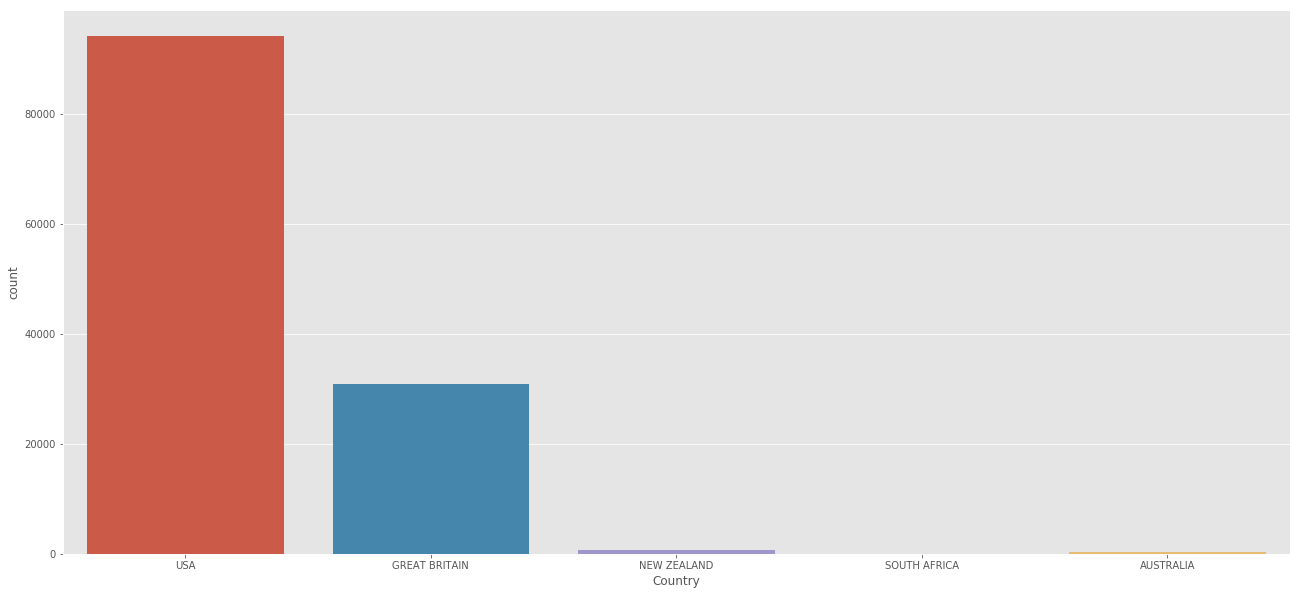

In [19]:
##EDA
# country
print(aerial['Country'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(aerial['Country'])
plt.show()

In [20]:
# Top target countries
print(aerial['Target Country'].value_counts())

GERMANY                             61743
ITALY                               23679
FRANCE                              22226
BURMA                                8259
PHILIPPINE ISLANDS                   8180
NEW GUINEA                           7213
AUSTRIA                              4371
CHINA                                4060
HOLLAND OR NETHERLANDS               3560
BISMARK ARCHIPELAGO                  3484
CELEBES ISLANDS                      3094
JAPAN                                2748
UNKNOWN OR NOT INDICATED             2742
BELGIUM                              2149
TUNISIA                              1978
FORMOSA AND RYUKYU ISLANDS           1803
SOLOMON ISLANDS                      1689
BORNEO                               1399
CAROLINE ISLANDS                     1032
CZECHOSLOVAKIA                        994
VOLCANO AND BONIN ISLANDS             966
YUGOSLAVIA                            925
HUNGARY                               867
ROMANIA                           

In [21]:
##too many countries ..lets see top 10 countries
# Top target countries
print(aerial['Target Country'].value_counts()[:10])

GERMANY                   61743
ITALY                     23679
FRANCE                    22226
BURMA                      8259
PHILIPPINE ISLANDS         8180
NEW GUINEA                 7213
AUSTRIA                    4371
CHINA                      4060
HOLLAND OR NETHERLANDS     3560
BISMARK ARCHIPELAGO        3484
Name: Target Country, dtype: int64


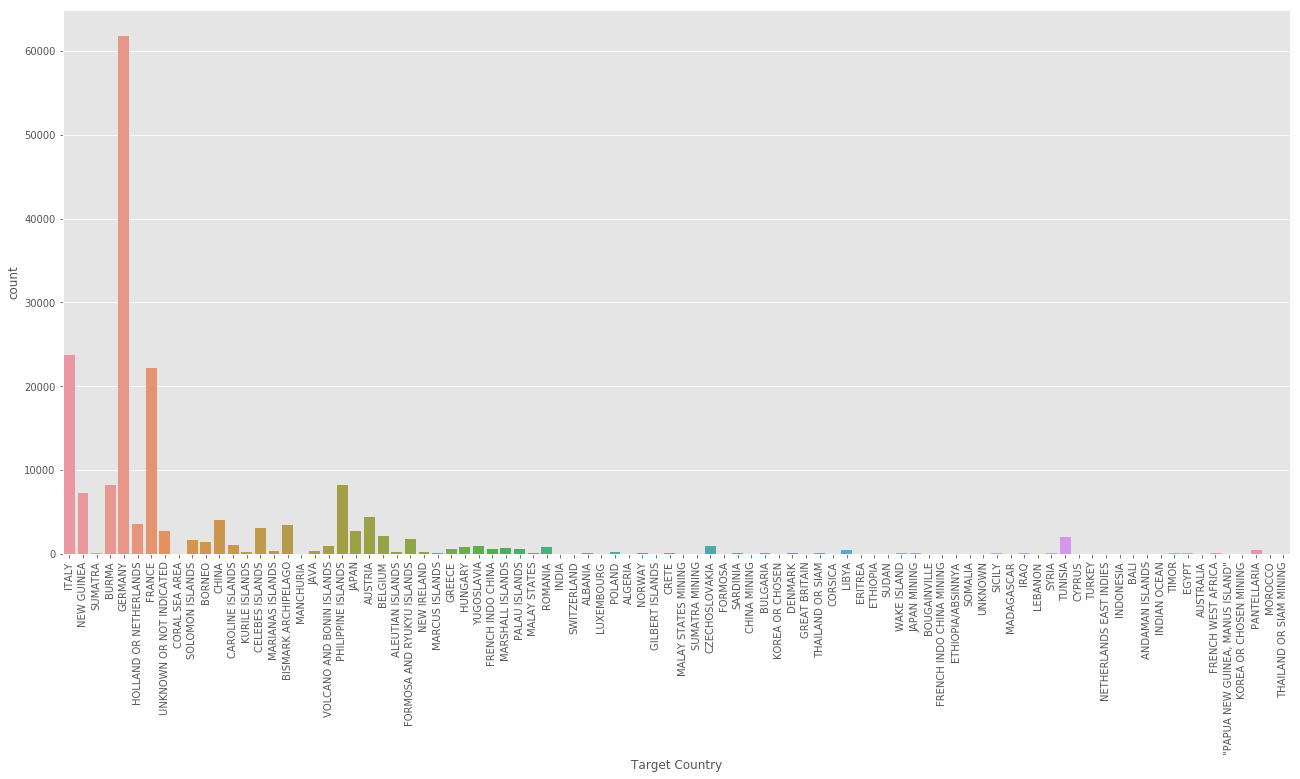

In [22]:
plt.figure(figsize=(22,10))
sns.countplot(aerial['Target Country'])
plt.xticks(rotation=90)
plt.show()

In [25]:
# Aircraft Series
data = aerial['Aircraft Series'].value_counts()
print(data[:10])
data = [go.Bar(
            x=data[:10].index,
            y=data[:10].values,
            hoverinfo = 'text',
            marker = dict(color = 'rgba(177, 14, 22, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
    )]

layout = dict(
    title = 'Aircraft Series',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

B24     33837
B17     31448
B25     17359
A20     12561
B26     11980
GB17     9124
WELL     6391
HVY      6298
A26      4736
P47      4660
Name: Aircraft Series, dtype: int64


In [26]:
# ATTACK
aerial["color"] = ""
aerial.color[aerial.Country == "USA"] = "rgb(0,116,217)"
aerial.color[aerial.Country == "GREAT BRITAIN"] = "rgb(255,65,54)"
aerial.color[aerial.Country == "NEW ZEALAND"] = "rgb(133,20,75)"
aerial.color[aerial.Country == "SOUTH AFRICA"] = "rgb(255,133,27)"

data = [dict(
    type='scattergeo',
    lon = aerial['Takeoff Longitude'],
    lat = aerial['Takeoff Latitude'],
    hoverinfo = 'text',
    text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 10 ,
        line = dict(width=1,color = "white"),
        color = aerial["color"],
        opacity = 0.7),
)]
layout = dict(
    title = 'Countries Take Off Bases ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='Mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

ValueError: 
    Invalid element(s) received for the 'color' property of scattergeo.marker
        Invalid elements include: ['', '', '', '', '', '', '', '', '', '']

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, saddlebrown, salmon, sandybrown,
            seagreen, seashell, sienna, silver, skyblue,
            slateblue, slategray, slategrey, snow, springgreen,
            steelblue, tan, teal, thistle, tomato, turquoise,
            violet, wheat, white, whitesmoke, yellow,
            yellowgreen
      - A number that will be interpreted as a color
        according to scattergeo.marker.colorscale
      - A list or array of any of the above

In [ ]:
# Bombing paths
airports = [ dict(
        type = 'scattergeo',
        lon = aerial['Takeoff Longitude'],
        lat = aerial['Takeoff Latitude'],
        hoverinfo = 'text',
        text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
        mode = 'markers',
        marker = dict( 
            size=5, 
            color = aerial["color"],
            line = dict(
                width=1,
                color = "white"
            )
        ))]

targets = [ dict(
        type = 'scattergeo',
        lon = aerial['Target Longitude'],
        lat = aerial['Target Latitude'],
        hoverinfo = 'text',
        text = "Target Country: "+aerial["Target Country"]+" Target City: "+aerial["Target City"],
        mode = 'markers',
        marker = dict( 
            size=1, 
            color = "red",
            line = dict(
                width=0.5,
                color = "red"
            )
        ))]
        

flight_paths = []
for i in range( len( aerial['Target Longitude'] ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            lon = [ aerial.iloc[i,9], aerial.iloc[i,16] ],
            lat = [ aerial.iloc[i,8], aerial.iloc[i,15] ],
            mode = 'lines',
            line = dict(
                width = 0.7,
                color = 'black',
            ),
            opacity = 0.6,
        )
    )
    
layout = dict(
    title = 'Bombing Paths from Attacker Country to Target ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='Mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
    
fig = dict( data=flight_paths + airports+targets, layout=layout )
iplot( fig )

In [ ]:
#Theater of Operations
print(aerial['Theater of Operations'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(aerial['Theater of Operations'])
plt.show()

In [ ]:
# weather station locations

data = [dict(
    type='scattergeo',
    lon = weather_station_location.Longitude,
    lat = weather_station_location.Latitude,
    hoverinfo = 'text',
    text = "Name: " + weather_station_location.NAME + " Country: " + weather_station_location["STATE/COUNTRY ID"],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 8 ,
        line = dict(width=1,color = "white"),
        color = "blue",
        opacity = 0.7),
)]
layout = dict(
    title = 'Weather Station Locations ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='Mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)